In [46]:
# RHS as mu*sinh(mu*y) -- NonLinear
# March 20 2022
# Boundary Conditions : y(0)=0, y(1)=1
# Plotting equation (3) from paper -> y(t) vs t
# y(t)= sum (1,nn)[alphai(e_fun)]
import math
import random
import numpy as np

#Declaring mu
mu=0.25

#Values we got for X

#(-0.74884236,  0.07157031,  0.09660516,  0.25548166,  0.06860153,
#       -0.00288796,  0.2584744 ,  0.08552833,  0.01897233,  0.02253565,
#        0.10360586,  0.10009348,  0.02253565,  0.10360586,  0.10009348,
#        0.02253565,  0.10360586,  0.10009348,  0.02253565,  0.10360586,
#        0.10009348,  0.02253565,  0.10360586,  0.10009348,  0.02253565,
#        0.10360586,  0.10009348,  0.10120184,  0.09443976,  0.01500584)

#Small functions for clarity
def e_fun(b,w,t):
    return math.exp(-((w*t+b)**2))

#Functions for calculating eps1 and eps2
# At every time point, calculate for all neurons. 
def eps1(x,time,nn):
    eps1=0
    realx=x
    time_points=np.linspace(0,1,time+1)
    for t in time_points:
        #print(t)
        
        #lOOPING OVER NN NEURONS FOR Y
        y_fun=0
        for i in range(0,nn):
            y_fun=y_fun+x[0]*e_fun(x[1],x[2],t)
            if len(x)>3:
                idx_list = [0,1,2]
                x = [ele for idx, ele in enumerate(x) if idx not in idx_list]
        #print("y_fun",y_fun)
        
        #lOOPING OVER NN NEURONS FOR D2Y/DT2
        sum=0
        for i in range(0,nn):
            #print("Input variables for eps1:", x)            
            sum=sum+(x[0]*x[2]**2*e_fun(x[1],x[2],t)*(-2 + 4*(x[2]*t+x[1])**2))
            if len(x)>3:
                idx_list = [0,1,2]
                x = [ele for idx, ele in enumerate(x) if idx not in idx_list]
                
        diff2 = (sum - mu*math.sinh(mu*y_fun))**2
        x=realx
        #print("diff2",diff2)
        #print("At Time", t,":-")
        #print("eps1: ", sum)
        eps1=eps1+diff2/(time+1)
        
    return eps1

def eps2(x,nn):
    
    y_fun_y0=0
    y_fun_y1=0
    for i in range(0,nn):
            y_fun_y0=y_fun_y0+x[0]*e_fun(x[1],x[2],0)
            if len(x)>3:
                idx_list = [0,1,2]
                x = [ele for idx, ele in enumerate(x) if idx not in idx_list]
            #print("y_fun_y0",y_fun_y0)
    for i in range(0,nn):
            y_fun_y1=y_fun_y1+x[0]*e_fun(x[1],x[2],1)
            if len(x)>3:
                idx_list = [0,1,2]
                x = [ele for idx, ele in enumerate(x) if idx not in idx_list]
            #print("y_fun_y1",y_fun_y1)
    
            #print("Input variables for eps2:", x)
    eps2=(1/2)*((y_fun_y0)**2 + (y_fun_y1-1)**2)
    #print(eps2)
            
    return eps2
        

# Input Arguments
# X contains values of alpha, beta, and omega respectively for every neuron
def main(x,nn,time):
    #x=[1,0,1]
    #for i in range(0,nn*3):
        #n = random.randint(0,1)
        #x.append(n)
    
    if len(x)!=3*nn:
        print("Incorrect number of variables!!")
    else:
        print("\neps1", eps1(x, time, nn))
        print("eps2",eps2(x,nn))    
        print("eps1+eps2:",eps1(x, time, nn)+eps2(x,nn))
        return x

# Arguments : x, nn, time
#x=[-0.74884236,  0.07157031,  0.09660516,  0.25548166,  0.06860153,-0.00288796,  0.2584744 ,  0.08552833,  0.01897233,  0.02253565,0.10360586,  0.10009348,  0.02253565,  0.10360586,  0.10009348,0.02253565,  0.10360586,  0.10009348,  0.02253565,  0.10360586,0.10009348,  0.02253565,  0.10360586,  0.10009348,  0.02253565,0.10360586,  0.10009348,  0.10120184,  0.09443976,  0.01500584]
x = [0.33106630746093,-2.22523932309321,2.50286397794446,0.18318904604565,-0.18171048586718,0.48735151578291,0.16825901171291,1.32225884340926,-3.20762935165731,0.18832242950032,-1.96235057319441,2.46360013878213,0.19297432952182,1.39022728486336,-2.83667653035963,-0.19342803926994,0.18399680240456,-2.74066539581587,-0.15794352372423,1.66045303204920,2.15953688129414,-0.22027615575678,-1.68520090536719,-2.73536850799912,0.03301393352949,-0.01453070784789,1.76960437296316,0.22595635221298,-0.70033943516761,2.17247251419870 ]

main(x, 10, 10)
#[1,0,1,1,0,1,0.3,0.4,0.5]


eps1 148.2807058242058
eps2 0.29520711444561365
eps1+eps2: 148.5759129386514


[0.33106630746093,
 -2.22523932309321,
 2.50286397794446,
 0.18318904604565,
 -0.18171048586718,
 0.48735151578291,
 0.16825901171291,
 1.32225884340926,
 -3.20762935165731,
 0.18832242950032,
 -1.96235057319441,
 2.46360013878213,
 0.19297432952182,
 1.39022728486336,
 -2.83667653035963,
 -0.19342803926994,
 0.18399680240456,
 -2.74066539581587,
 -0.15794352372423,
 1.6604530320492,
 2.15953688129414,
 -0.22027615575678,
 -1.68520090536719,
 -2.73536850799912,
 0.03301393352949,
 -0.01453070784789,
 1.76960437296316,
 0.22595635221298,
 -0.70033943516761,
 2.1724725141987]

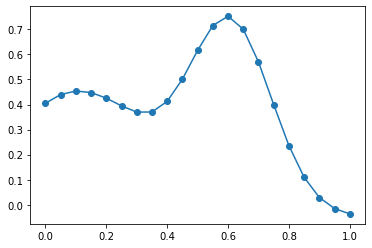

In [54]:
import matplotlib.pyplot as plt
def my_func(x,nn,time):
    t_list=[]
    y_list=[]
    eps1=0
    realx=x
    time_points=np.linspace(0,1,time+1)
    for t in time_points:
        #print("time: ",t)
        
        #lOOPING OVER NN NEURONS FOR Y
        y_fun=0
        for i in range(0,nn):
            #print(t)
            y_fun=y_fun+(x[0]*e_fun(x[1],x[2],t))
            if len(x)>3:
                idx_list = [0,1,2]
                x = [ele for idx, ele in enumerate(x) if idx not in idx_list]
       
        t_list.append(t)
        y_list.append(y_fun)
        x=realx       
        
    #print("Y_list",y_list)
    #print("t_list", t_list)
    plt.scatter(t_list,y_list)
    plt.plot(t_list,y_list)
    plt.show()
#print(len(x))
#print(x)
x_mudiff=[0.49195021783858, 0.03613145789406, -0.31916628988347, 0.41060803166618, 0.52730156513132,-3.00797291766790, -0.55024529044115, 0.85123504425867,-1.88376144935215,0.78758840332611,-3.15193861155268,5.16785920687814 , -0.49912762826986, -1.73577517883465,-4.28694087071249 , 0.39997772439985, -0.95613528078345, 1.43836302827019,-0.62116332488245, -1.10231737498492,0.66127660670523,0.18876028749915, -0.38480301484296, 1.72298784992421,-0.16564943142555, 1.11190804500174, 1.89110086745495,-0.23815862345712, -0.43648258187640, 1.10326284877928 ] 
my_func(x_mudiff,10,20)  # Input Arguments = x, nn, time grids            

In [38]:
def e_fun(b,w,t):
    return math.exp(-(w*t+b)**2)
e_fun(0,1,1)

0.36787944117144233

In [ ]:
x_mudiff=[0.49195021783858, 0.03613145789406, -0.31916628988347, 0.41060803166618, 0.52730156513132,-3.00797291766790, -0.55024529044115, 0.85123504425867,-1.88376144935215,0.78758840332611,-3.15193861155268,5.16785920687814 , -0.49912762826986, -1.73577517883465,-4.28694087071249 , 0.39997772439985, -0.95613528078345, 1.43836302827019,-0.62116332488245, -1.10231737498492,0.66127660670523,0.18876028749915, -0.38480301484296, 1.72298784992421,-0.16564943142555, 1.11190804500174, 1.89110086745495,-0.23815862345712, -0.43648258187640, 1.10326284877928 ] 